<a href="https://colab.research.google.com/github/roshashrestha/githubtest/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pratik Dhungana(ACE080BCT050)

Rosha Shrestha(ACE080BCT060)

Saurya Pant(ACE080BCT072)


Data Visualisation

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/sportscar.csv", thousands=',')

# Data Cleaning
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Drop rows with missing values (if any)
df.dropna(inplace=True)

# Check for duplicates
print("\nNumber of duplicate rows:")
print(df.duplicated().sum())

# Drop duplicates
df.drop_duplicates(inplace=True)

# Check unique values in 'Gender of buyer'
print("\nUnique values in 'Gender of buyer':")
print(df['Gender of buyer'].unique())

# Filter to keep only 'M' and 'F' in 'Gender of buyer'
df = df[df['Gender of buyer'].isin(['M', 'F'])]

# Ensure 'Age of Buyer' is numeric
df['Age of Buyer'] = pd.to_numeric(df['Age of Buyer'], errors='coerce')

# Drop rows where 'Age of Buyer' is NaN after conversion
df.dropna(subset=['Age of Buyer'], inplace=True)

# Convert relevant columns to numeric types if they are not already
df['Engine Size (L)'] = pd.to_numeric(df['Engine Size (L)'], errors='coerce')
df['Horsepower'] = pd.to_numeric(df['Horsepower'], errors='coerce')

# Clean 'Torque (lb-ft)' and '0-60 MPH Time (seconds)' columns
df['Torque (lb-ft)'] = pd.to_numeric(df['Torque (lb-ft)'], errors='coerce')
df['0-60 MPH Time (seconds)'] = pd.to_numeric(df['0-60 MPH Time (seconds)'], errors='coerce')

# Drop rows where 'Torque (lb-ft)' or '0-60 MPH Time (seconds)' is NaN after conversion
df.dropna(subset=['Torque (lb-ft)', '0-60 MPH Time (seconds)'], inplace=True)

# Recode Engine Size into bins
bins = [0, 2, 3, 4, 5, 6, 7, 8]  # Define the bins for engine size
labels = ['0-2L', '2-3L', '3-4L', '4-5L', '5-6L', '6-7L', '7-8L']  # Labels for the bins
df['Engine Size Range'] = pd.cut(df['Engine Size (L)'], bins=bins, labels=labels)


Missing values in each column:
Car Make                    0
Car Model                   8
Year                        0
Engine Size (L)            14
Horsepower                  0
Torque (lb-ft)              3
0-60 MPH Time (seconds)     0
Price (in USD)              0
Gender of buyer             4
Age of Buyer                0
dtype: int64

Number of duplicate rows:
6

Unique values in 'Gender of buyer':
['F' 'M']


Line chart


<ipython-input-80-b901bd457ddb>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_horsepower = df.groupby('Engine Size Range')['Horsepower'].mean().reset_index()


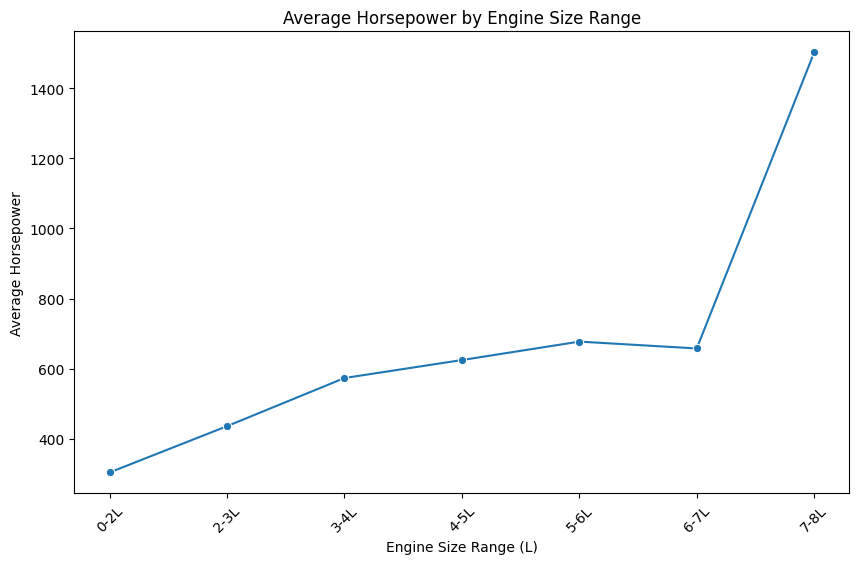

In [ ]:
# Calculate average horsepower for each engine size range
avg_horsepower = df.groupby('Engine Size Range')['Horsepower'].mean().reset_index()

# 1. Line Chart: Average Horsepower by Engine Size Range
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_horsepower, x='Engine Size Range', y='Horsepower', marker='o')
plt.title("Average Horsepower by Engine Size Range")
plt.xlabel("Engine Size Range (L)")
plt.ylabel("Average Horsepower")
plt.xticks(rotation=45)
plt.show()

Bar plot

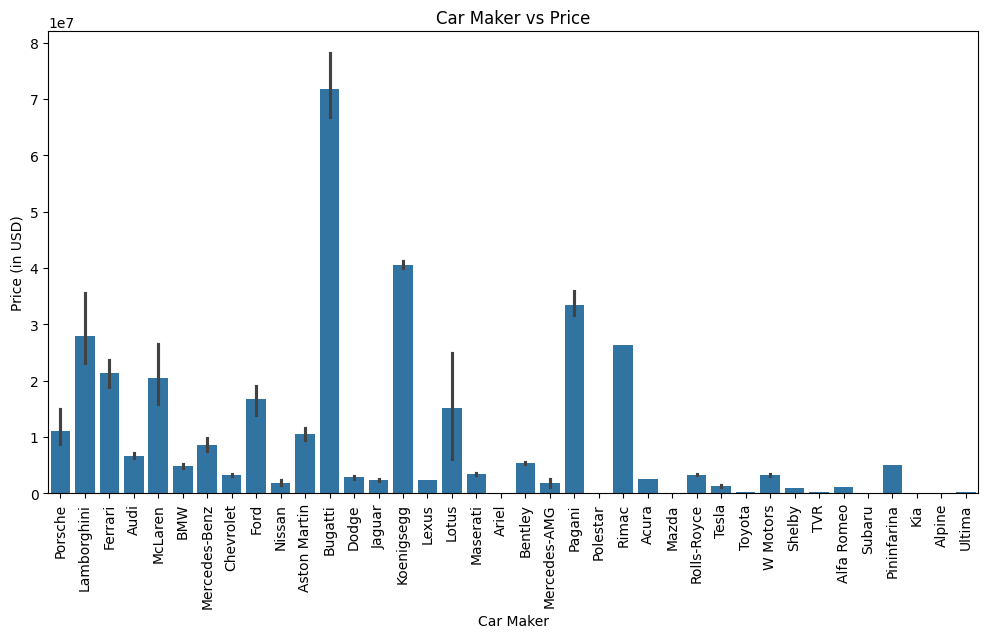

In [ ]:
# 2. Bar Plot: Car Maker vs Price
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Car Make', y='Price (in USD)', estimator=sum)
plt.title("Car Maker vs Price")
plt.xlabel("Car Maker")
plt.ylabel("Price (in USD)")
plt.xticks(rotation=90)
plt.show()


Pie chart

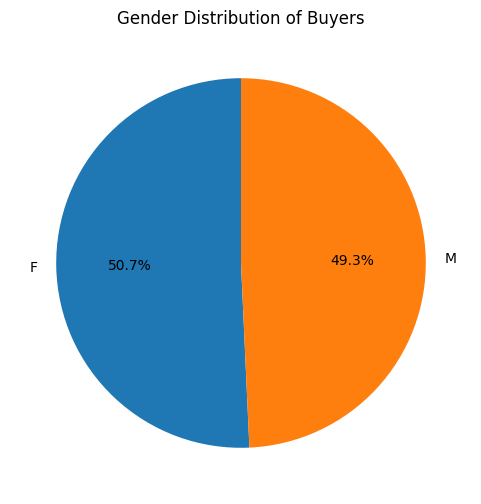

In [ ]:
# 3. Pie Chart: Gender Distribution
gender_counts = df['Gender of buyer'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Gender Distribution of Buyers")
plt.show()

Box plot

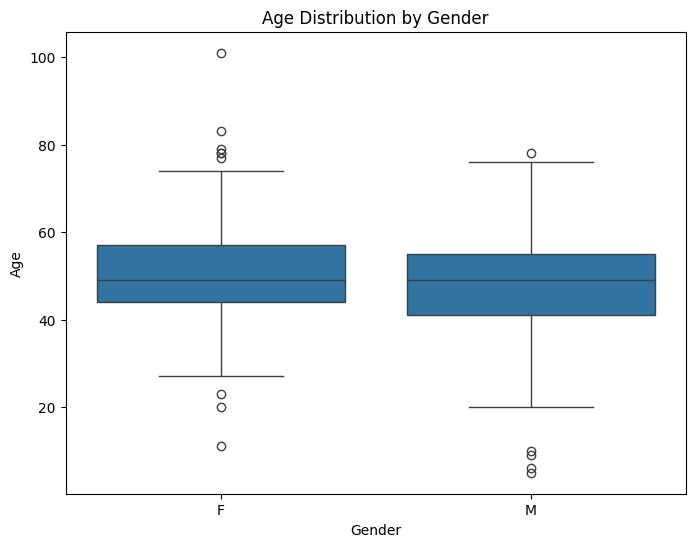

In [ ]:
# 4. Box Plot: Age Distribution by Gender
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Gender of buyer', y='Age of Buyer')
plt.title("Age Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Age")
plt.show()

Histogram

Text(0, 0.5, 'Frequency')

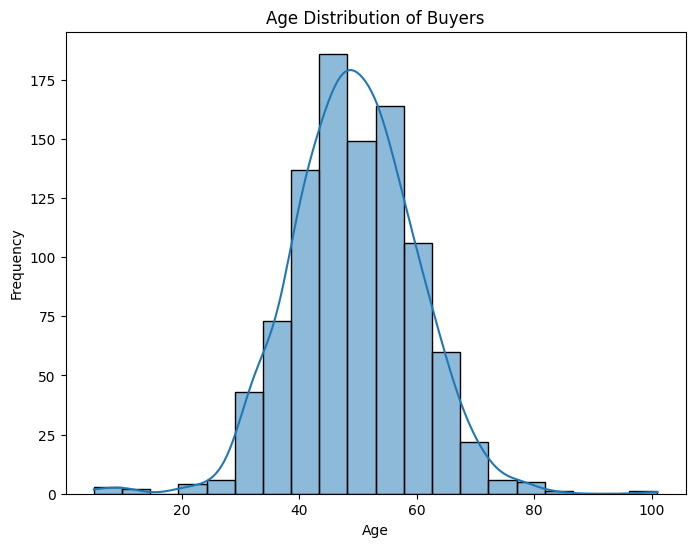

In [ ]:
# 5. Histogram: Age Distribution of Buyers
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Age of Buyer', bins=20, kde=True)
plt.title("Age Distribution of Buyers")
plt.xlabel("Age")
plt.ylabel("Frequency")

Scatter plot

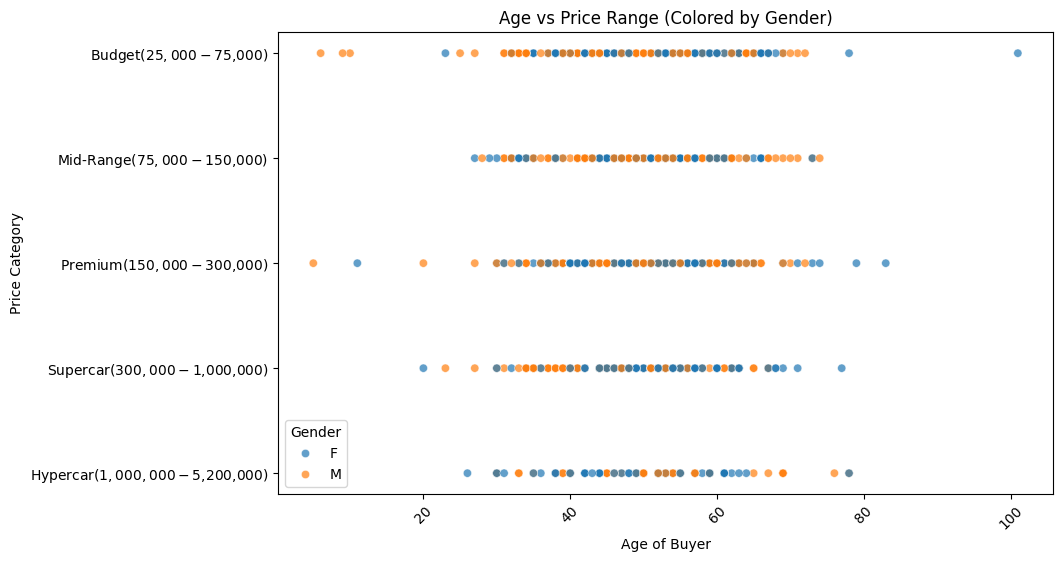

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/sportscar.csv", thousands=',')

# Convert price column to numeric first
df['Price (in USD)'] = pd.to_numeric(df['Price (in USD)'], errors='coerce')

# Define price range bins and labels (corrected typo)
bins = [25000, 75000, 150000, 300000, 1000000, 5200000]
labels = [
    "Budget($25,000 - $75,000)",
    "Mid-Range($75,000 - $150,000)",
    "Premium($150,000 - $300,000)",
    "Supercar($300,000 - $1,000,000)",
    "Hypercar($1,000,000 - $5,200,000)"
]

# Categorize prices into bins

df['Price Range'] = pd.cut(df['Price (in USD)'], bins=bins, labels=labels)

# Drop rows with missing values in Price Range
df = df.dropna(subset=['Price Range'])

# Create scatter plot (Age vs Price Range)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age of Buyer', y='Price Range', hue='Gender of buyer', alpha=0.7)

plt.title("Age vs Price Range (Colored by Gender)")
plt.xlabel("Age of Buyer")
plt.ylabel("Price Category")
plt.legend(title="Gender")
plt.xticks(rotation=45)

plt.show()




Heat map

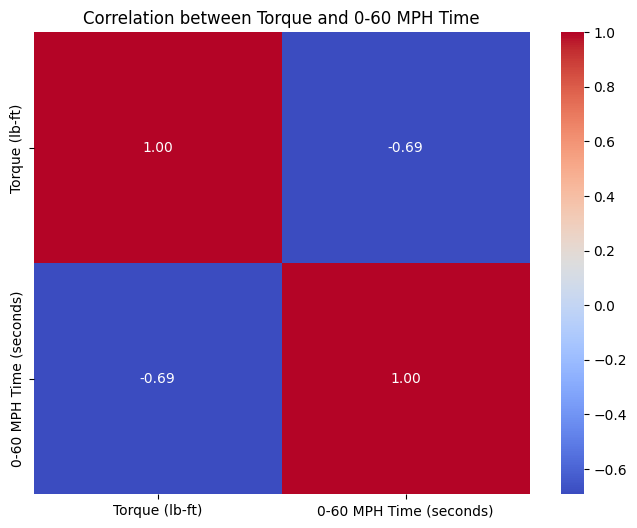

In [ ]:
# 7. Heatmap: Correlation between Torque and 0-60 MPH Time
correlation_matrix = df[['Torque (lb-ft)', '0-60 MPH Time (seconds)']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation between Torque and 0-60 MPH Time")
plt.show()

Measures of central tendency


In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

def load_sportscar_data(SPORTSCAR_PATH):
    return pd.read_csv(SPORTSCAR_PATH)

# Load dataset
sportscar=load_sportscar_data("/content/drive/MyDrive/Colab Notebooks/sportscar.csv")

#Age
mean_age = np.mean(sportscar["Age of Buyer"])
print(f"Mean Age of Buyers: {mean_age:.2f}")

median_age = np.median(sportscar["Age of Buyer"])
print(f"Median Age of Buyers: {median_age:.2f}")

mode_price = stats.mode(sportscar["Age of Buyer"], keepdims=True)
print(f"Mode Age of Buyers: {mode_price.mode[0]:.2f}")

#Car price
sportscar["Price (in USD)"] = sportscar["Price (in USD)"].replace('[,]', '', regex=True).astype(float)#regex(regular expression)=true=>it's regilar expression not plain string//astype=>converts data stored as string to float
mean_price = np.mean(sportscar["Price (in USD)"])
print(f"Mean Car Price: {mean_price:.2f}")

median_price = np.median(sportscar["Price (in USD)"])
print(f"Median Car Price: {median_price:.2f}")

mode_price = stats.mode(sportscar["Price (in USD)"], keepdims=True)
print(f"Mode Car Price: {mode_price.mode[0]:.2f}")



Mean Age of Buyers: 49.36
Median Age of Buyers: 49.00
Mode Age of Buyers: 49.00
Mean Car Price: 382035.94
Median Car Price: 140000.00
Mode Car Price: 500000.00


Measures of Variance

For age


Range: 96
Standard Deviation: 10.366083020656433
Variance: 107.45567719114159


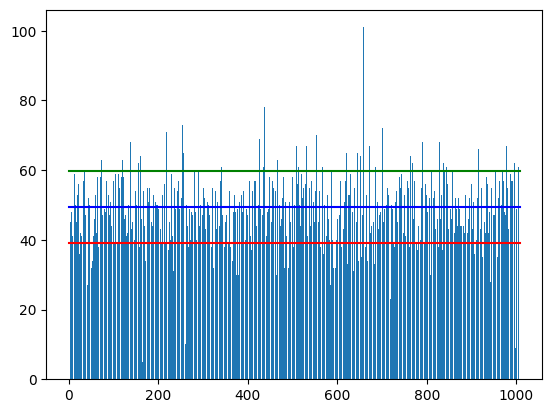

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#Calculating range, standard deviation, and variance
ranges = np.max(sportscar["Age of Buyer"]) - np.min(sportscar["Age of Buyer"])
print("Range:",ranges)

std = np.std(sportscar["Age of Buyer"])
print("Standard Deviation:",std)

var = np.var(sportscar["Age of Buyer"])
print("Variance:",var)

ages = sportscar["Age of Buyer"]

#Calculating mean and standard deviation
mean_age = np.mean(ages)
std_dev_age = np.std(ages)

#Plotting bar chart
y_pos = range(len(ages))
plt.bar(y_pos, ages)

# Plot the center (mean)
plt.plot((0, len(ages)), (mean_age, mean_age), 'b-')  # the center (mean)

# Plot the mean plus standard deviation (green)
plt.plot((0, len(ages)), (mean_age + std_dev_age, mean_age + std_dev_age), 'g-')

# Plot the mean minus standard deviation (red)
plt.plot((0, len(ages)), (mean_age - std_dev_age, mean_age - std_dev_age), 'r-')

plt.show()

#the outliers exceed the green line


Range: 5175000.0
Standard Deviation: 737956.0298411001
Variance: 544579101978.8386


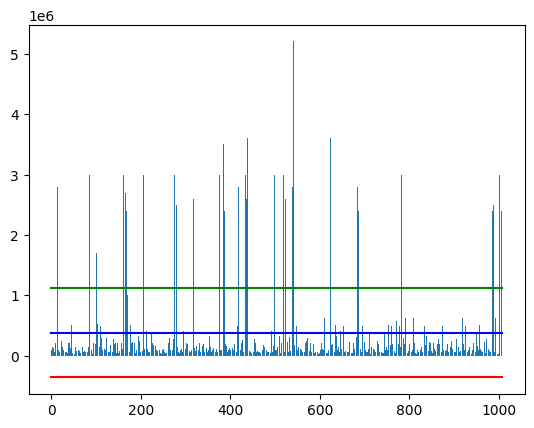

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#Cleaning "Price (in USD)" column by removing commas and converting to float
price = sportscar["Price (in USD)"].replace('[,]', '', regex=True).astype(float)

#Calculating range, standard deviation, and variance
ranges = np.max(price) - np.min(price)
print("Range:", ranges)

std = np.std(price)
print("Standard Deviation:", std)

var = np.var(price)
print("Variance:", var)

# Calculate the mean and standard deviation for price
mean_price = np.mean(price)
std_dev_price = np.std(price)

#Plotting bar chart
y_pos = range(len(price))
plt.bar(y_pos, price)

# Plot the center (mean)
plt.plot((0, len(price)), (mean_price, mean_price), 'b-')  # the center (mean)

# Plot the mean plus standard deviation (green)
plt.plot((0, len(price)), (mean_price + std_dev_price, mean_price + std_dev_price), 'g-')

# Plot the mean minus standard deviation (red)
plt.plot((0, len(price)), (mean_price - std_dev_price, mean_price - std_dev_price), 'r-')

plt.show()

#the outliers exceed the green line

Removing outliers

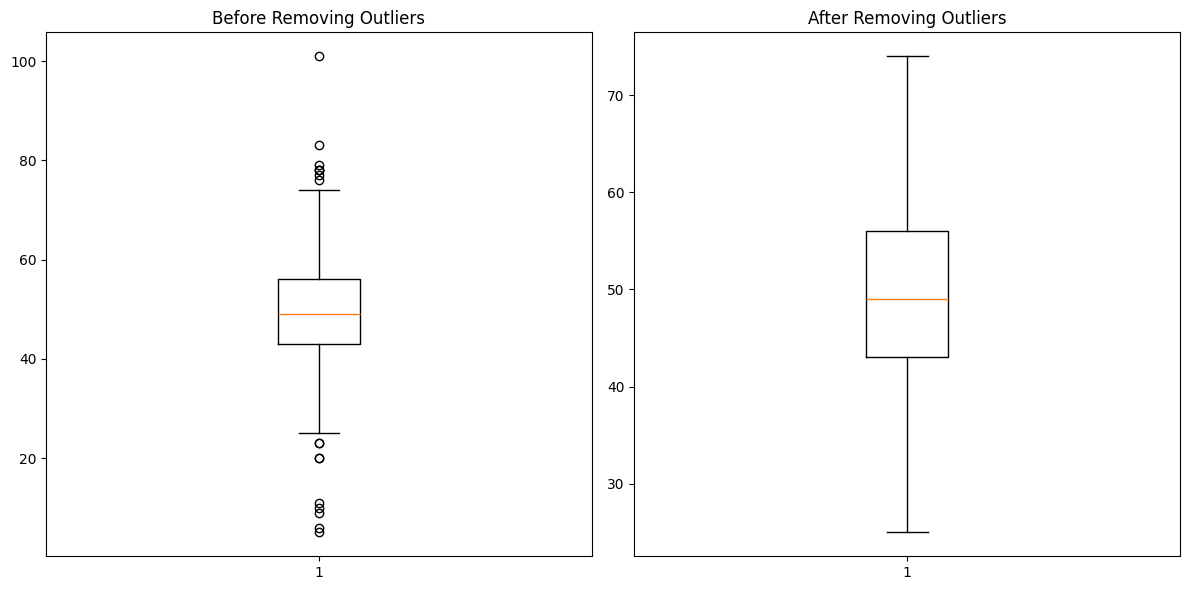

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Given data
ages = sportscar["Age of Buyer"]

# Step 1: Calculate Q1, Q3, and IQR
Q1 = np.percentile(ages, 25)
Q3 = np.percentile(ages, 75)
IQR = Q3 - Q1

# Step 2: Calculate lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Remove outliers
filtered_ages = [x for x in ages if lower_bound <= x <= upper_bound]

# Plotting before and after removing outliers
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Before removing outliers
ax1.boxplot(ages)
ax1.set_title("Before Removing Outliers")

# After removing outliers
ax2.boxplot(filtered_ages)
ax2.set_title("After Removing Outliers")

plt.tight_layout()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
## bayesian theorem

import pandas as pd

# Load the dataset
sportscar = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sportscar.csv')

# Select relevant columns
sportscar = sportscar[['Gender of buyer', 'Price (in USD)']]

# Total number of buyers
total_buyers = len(sportscar)

# Calculate P(M): Probability of being male
male_count = len(sportscar[sportscar['Gender of buyer'] == 'M'])
p_male = male_count / total_buyers

# Calculate P(F): Probability of being female
female_count = len(sportscar[sportscar['Gender of buyer'] == 'F'])
p_female = female_count / total_buyers

# Calculate P(E): Probability of buying a car more expensive than $100k
sportscar["Price (in USD)"] = sportscar["Price (in USD)"].replace('[,]', '', regex=True).astype(float)
expensive_car_count = len(sportscar[sportscar['Price (in USD)'] > 100000])
p_expensive = expensive_car_count / total_buyers

# Calculate P(E | M): Probability of buying an expensive car given the buyer is male
male_expensive_count = len(sportscar[(sportscar['Gender of buyer'] == 'M') & (sportscar['Price (in USD)'] > 100000)])
p_expensive_given_male = male_expensive_count / male_count

# Calculate P(E | F): Probability of buying an expensive car given the buyer is female
female_expensive_count = len(sportscar[(sportscar['Gender of buyer'] == 'M') & (sportscar['Price (in USD)'] > 100000)])
p_expensive_given_female = female_expensive_count / female_count

# Apply Bayes' Theorem: P(M | E) and P(F | E)
p_male_given_expensive = (p_expensive_given_male * p_male) / p_expensive
p_female_given_expensive = (p_expensive_given_female * p_female) / p_expensive

# Display the results
print(f"Probability of buying a car more expensive than $100k given the buyer is male: {p_male_given_expensive:.4f}")
print(f"Probability of buying a car more expensive than $100k given the buyer is female: {p_female_given_expensive:.4f}")

Probability of buying a car more expensive than $100k given the buyer is male: 0.4757
Probability of buying a car more expensive than $100k given the buyer is female: 0.4757


In [ ]:
## hypothesis testing with t and p value

import pandas as pd
import numpy as np
import scipy.stats as stats

# Load your dataset (adjust the file path and method as needed)
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sportscar.csv')

# Filter the dataset for male buyers (adjust the condition based on your data)
male_data = data[data['Gender of buyer'] == 'M']

# Extract the 'price' column for male buyers
prices = male_data['Price (in USD)']
prices = prices.str.replace(",", "").astype(float)

# Define the hypothesized mean price under the null hypothesis (H0)
hypothesized_mean = 200000

# Calculate sample statistics for male buyers
sample_mean = prices.mean()
sample_std = prices.std(ddof=1)  # sample standard deviation
sample_size = len(prices)

# Calculate the t-statistic
t_statistic = (sample_mean - hypothesized_mean) / (sample_std / np.sqrt(sample_size))

# Define degrees of freedom
df = sample_size - 1

# Set the significance level (alpha)
alpha = 0.05

# For a one-tailed test (right tail), calculate the critical t-value
critical_t = stats.t.ppf(1 - alpha, df)

# Calculate the p-value for the one-tailed test
p_value = 1 - stats.t.cdf(t_statistic, df)

# Print the results
print("Sample Mean Price:", sample_mean)
print("T-Statistic:", t_statistic)
print("Critical t-value:", critical_t)
print("P-Value:", p_value)

# Decision based on t-value
print('Decision using T-value:')
if t_statistic > critical_t:
    print("There is significant evidence that male buyers purchase cars with an average price greater than $200,000.")
else:
    print("There is insufficient evidence to conclude that male buyers purchase cars with an average price greater than $200,000.")

# Decision based on p-value
print('Decision using P-value:')
if p_value < alpha:
    print("We reject the null hypothesis. Male buyers tend to buy more expensive cars (average price > $200,000).")
else:
    print("We fail to reject the null hypothesis. There is no significant evidence that male buyers purchase cars with an average price greater than $200,000.")



Sample Mean Price: 361658.14227642276
T-Statistic: 4.83867846359804
Critical t-value: 1.6479629257277375
P-Value: 8.76408988381705e-07
Decision using T-value:
There is significant evidence that male buyers purchase cars with an average price greater than $200,000.
Decision using P-value:
We reject the null hypothesis. Male buyers tend to buy more expensive cars (average price > $200,000).


In [ ]:
##imputing some numerical columns with median

import pandas as pd

# Convert columns to numeric before filling missing values
df_median = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sportscar.csv')

# Convert columns to numeric (coerce will set invalid parsing to NaN)
df_median['Price (in USD)'] = pd.to_numeric(df_median['Price (in USD)'], errors='coerce')
df_median['Torque (lb-ft)'] = pd.to_numeric(df_median['Torque (lb-ft)'], errors='coerce')
df_median['Horsepower'] = pd.to_numeric(df_median['Horsepower'], errors='coerce')

# Impute missing values with the median
df_median['Price (in USD)'].fillna(df_median['Price (in USD)'].median(), inplace=True)
df_median['Torque (lb-ft)'].fillna(df_median['Torque (lb-ft)'].median(), inplace=True)
df_median['Horsepower'].fillna(df_median['Horsepower'].median(), inplace=True)

print("\nDataFrame after imputing numerical columns with median:")
print(df_median)


DataFrame after imputing numerical columns with median:
         Car Make Car Model  Year Engine Size (L)  Horsepower  Torque (lb-ft)  \
0         Porsche       911  2022               3       379.0           331.0   
1     Lamborghini   Huracan  2021             5.2       630.0           443.0   
2         Ferrari   488 GTB  2022             3.9       661.0           561.0   
3            Audi        R8  2022             5.2       562.0           406.0   
4         McLaren      720S  2021               4       710.0           568.0   
...           ...       ...   ...             ...         ...             ...   
1002   Koenigsegg     Jesko  2022               5      1280.0          1106.0   
1003        Lotus     Evija  2021  Electric Motor      1972.0          1254.0   
1004      McLaren       NaN  2021               4       789.0           590.0   
1005       Pagani    Huayra  2021               6       764.0           738.0   
1006        Rimac    Nevera  2021  Electric Motor   

<ipython-input-6-e542a74b9102>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_median['Price (in USD)'].fillna(df_median['Price (in USD)'].median(), inplace=True)
<ipython-input-6-e542a74b9102>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].

In [ ]:
##imputing a categorical column with mode

import pandas as pd
sportscar_converted= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sportscar.csv')
# Impute missing values in 'gender of buyer' with the most frequent value
sportscar_converted['Gender of buyer'] = sportscar_converted['Gender of buyer'].fillna(sportscar_converted['Gender of buyer'].mode()[0])

print("\nDataFrame after imputing 'Gender of buyer' with mode:")
print(sportscar_converted)


DataFrame after imputing 'Gender of buyer' with mode:
         Car Make Car Model  Year Engine Size (L) Horsepower Torque (lb-ft)  \
0         Porsche       911  2022               3        379            331   
1     Lamborghini   Huracan  2021             5.2        630            443   
2         Ferrari   488 GTB  2022             3.9        661            561   
3            Audi        R8  2022             5.2        562            406   
4         McLaren      720S  2021               4        710            568   
...           ...       ...   ...             ...        ...            ...   
1002   Koenigsegg     Jesko  2022               5       1280           1106   
1003        Lotus     Evija  2021  Electric Motor       1972           1254   
1004      McLaren       NaN  2021               4        789            590   
1005       Pagani    Huayra  2021               6        764            738   
1006        Rimac    Nevera  2021  Electric Motor       1888           1696 

In [ ]:
## label encoding of 'Gender of buyer' feature

from sklearn.preprocessing import LabelEncoder

# Apply Label Encoding to 'Gender of buyer'
label_encoder = LabelEncoder()
df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sportscar.csv')
df['Gender of buyer'] = label_encoder.fit_transform(df['Gender of buyer'])

print("\nDataFrame after Label Encoding for 'Size':\n", df)


DataFrame after Label Encoding for 'Size':
          Car Make Car Model  Year Engine Size (L) Horsepower Torque (lb-ft)  \
0         Porsche       911  2022               3        379            331   
1     Lamborghini   Huracan  2021             5.2        630            443   
2         Ferrari   488 GTB  2022             3.9        661            561   
3            Audi        R8  2022             5.2        562            406   
4         McLaren      720S  2021               4        710            568   
...           ...       ...   ...             ...        ...            ...   
1002   Koenigsegg     Jesko  2022               5       1280           1106   
1003        Lotus     Evija  2021  Electric Motor       1972           1254   
1004      McLaren       NaN  2021               4        789            590   
1005       Pagani    Huayra  2021               6        764            738   
1006        Rimac    Nevera  2021  Electric Motor       1888           1696   

     0

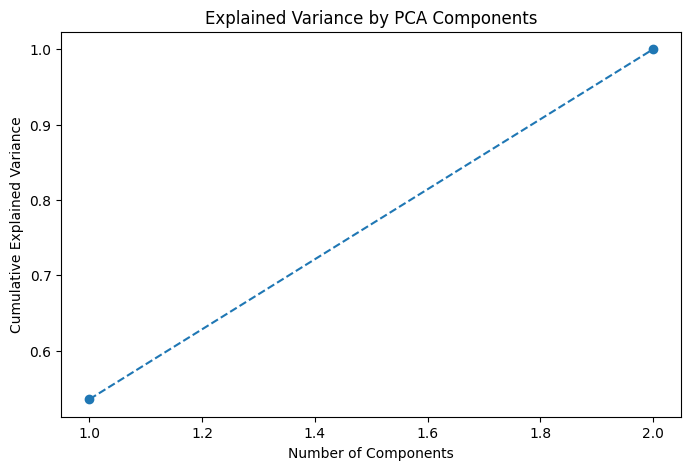

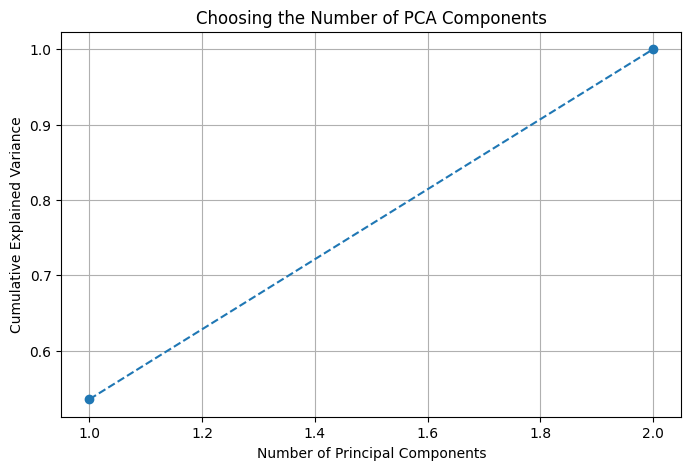

In [ ]:
## PCA(1)
##manually

import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/sportscar.csv")

# Selecting numerical features (excluding target 'Horsepower' if present)
numerical_features = df.select_dtypes(include=['float64', 'int64']).drop(columns=['Horsepower'], errors='ignore')

# Standardizing the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_features)

# Handling missing values
imputer = SimpleImputer(strategy="mean")
scaled_data = imputer.fit_transform(scaled_data)

# Determine max possible components
max_components = min(scaled_data.shape)  # min(n_samples, n_features)

# Choose the number of components dynamically
pca = PCA(n_components=max_components)
pca_features = pca.fit_transform(scaled_data)

# Convert to DataFrame
pca_df = pd.DataFrame(pca_features, columns=[f'PC{i+1}' for i in range(max_components)])

# Explained variance plot
explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o', linestyle='--')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by PCA Components")
plt.show()
## pca for horsepower




#PCA(2)
## for choosing n number of pca components

import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt


# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/sportscar.csv")

# Selecting numerical features (excluding target 'Horsepower' if present)
numerical_features = df.select_dtypes(include=['float64', 'int64']).drop(columns=['Torque (lb-ft)'], errors='ignore')

# Standardizing the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_features)

# Handling missing values
imputer = SimpleImputer(strategy="mean")
scaled_data = imputer.fit_transform(scaled_data)

# Determine max possible components
max_components = min(scaled_data.shape)  # min(n_samples, n_features)


# Apply PCA without specifying components (to analyze all)
pca = PCA()
pca.fit(scaled_data)

# Calculate cumulative variance explained
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the explained variance
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Choosing the Number of PCA Components")
plt.grid()
plt.show()
## here are only 3 principle components so 3 ota matra dekhayo even when we tried to analyze all(for torque)

<ipython-input-3-79d03b1a7488>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)
<ipython-input-3-79d03b1a7488>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

Time taken: 0.048769474029541016
Optimized Coefficients (Theta): [ 375780.52918044   79482.23869578  111368.38134451 -277502.58357327]
MSE (Train): 377871048546.06287
MSE (Test): 408111807723.6906


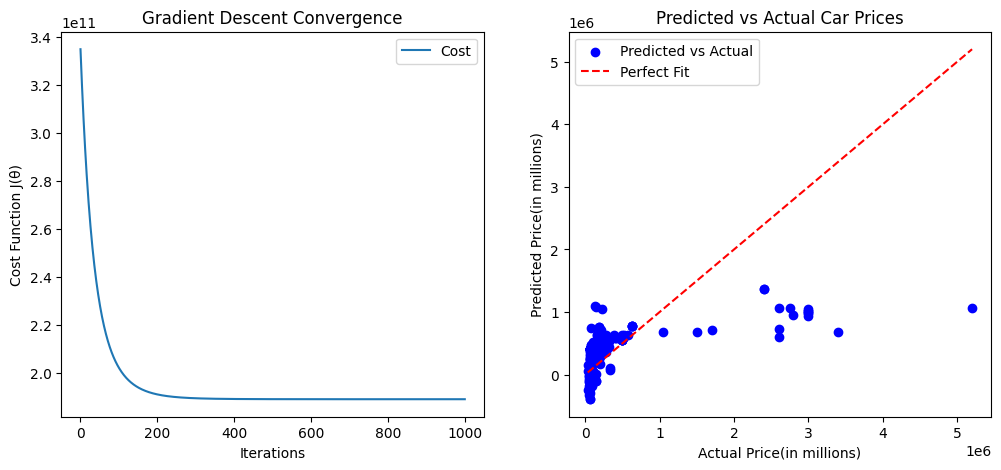

In [ ]:
## linear regression to predict price of car using variable torque,horsepower,(0-60)mph in secs features

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from time import time

data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/sportscar.csv")

# Clean and convert numeric columns as there were unwanted symbols
for col in ['Horsepower', 'Torque (lb-ft)', '0-60 MPH Time (seconds)', 'Price (in USD)']:
    data[col] = data[col].astype(str).str.replace(r'[^\d.]', '', regex=True)
    data[col] = pd.to_numeric(data[col], errors='coerce')  # Convert to float, set invalid to NaN
    data[col].fillna(data[col].median(), inplace=True)
    data[col] = data[col].astype(float)  # Convert to float

# Select relevant features
X = data[['Horsepower', 'Torque (lb-ft)', '0-60 MPH Time (seconds)']].values  # Features
y = data['Price (in USD)'].values  # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Add intercept (bias) term
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

# Initialize parameters
theta = np.zeros(X_train.shape[1])
alpha = 0.01  # Learning rate
iterations = 1000  # Number of iterations

# Gradient Descent
m = X_train.shape[0]
cost_history = []

start = time()
for _ in range(iterations):
    y_hat = X_train @ theta  # Predictions
    error = y_hat - y_train
    theta -= (alpha / m) * (X_train.T @ error)  # Update theta

    cost = (1 / (2 * m)) * np.sum(error ** 2)  # Compute cost
    cost_history.append(cost)
time_taken = time() - start

print("Time taken:", time_taken)
print("Optimized Coefficients (Theta):", theta)

# Compute MSE
def mse(y_pred, y_actual):
    return np.mean((y_pred - y_actual) ** 2)

y_train_pred = X_train @ theta
y_test_pred = X_test @ theta

mse_train = mse(y_train_pred, y_train)
mse_test = mse(y_test_pred, y_test)

print("MSE (Train):", mse_train)
print("MSE (Test):", mse_test)

# Visualization: Actual vs. Predicted Prices
plt.figure(figsize=(12, 5))

# Cost function convergence
plt.subplot(1, 2, 1)
plt.plot(range(iterations), cost_history, label="Cost")
plt.xlabel("Iterations")
plt.ylabel("Cost Function J(θ)")
plt.title("Gradient Descent Convergence")
plt.legend()

# Scatter plot: Predicted vs Actual Prices
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, c='blue', label="Predicted vs Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed', label="Perfect Fit")
plt.xlabel("Actual Price(in millions)")
plt.ylabel("Predicted Price(in millions)")
plt.title("Predicted vs Actual Car Prices")
plt.legend()

plt.show()


Feature Scaling

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/sportscar.csv")

# Initialize scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Select only numeric columns
df_numeric = df.select_dtypes(include=['number'])
df=pd.DataFrame(df_numeric)

# Apply scalers
df_standard =pd.DataFrame(standard_scaler.fit_transform(df), columns=df.columns)
df_minmax =pd.DataFrame(minmax_scaler.fit_transform(df), columns=df.columns)

# Display results
print("\nStandard Scaled Data:\n", df_standard)
print("\nMinMax Scaled Data:\n", df_minmax)



Standard Scaled Data:
           Year  Age of Buyer
0     0.402555      0.930006
1    -0.068261      0.737069
2     0.402555     -1.192300
3     0.402555      1.219411
4    -0.068261     -0.420553
...        ...           ...
1002  0.402555     -0.902895
1003 -0.068261     -0.613490
1004 -0.068261     -0.131147
1005 -0.068261      1.122943
1006 -0.068261     -1.095832

[1007 rows x 2 columns]

MinMax Scaled Data:
           Year  Age of Buyer
0     0.966102      0.562500
1     0.949153      0.541667
2     0.966102      0.333333
3     0.966102      0.593750
4     0.949153      0.416667
...        ...           ...
1002  0.966102      0.364583
1003  0.949153      0.395833
1004  0.949153      0.447917
1005  0.949153      0.583333
1006  0.949153      0.343750

[1007 rows x 2 columns]


Handling text and categorical values

In [ ]:
def load_sportscar_data(SPORTSCAR_PATH):
    return pd.read_csv(SPORTSCAR_PATH)
# Load dataset
sportscar=load_sportscar_data("/content/drive/MyDrive/Colab Notebooks/sportscar.csv")

sportscar["Gender of buyer"].value_counts()

,count
Gender of buyer,
F,511
M,492


Logistic regression

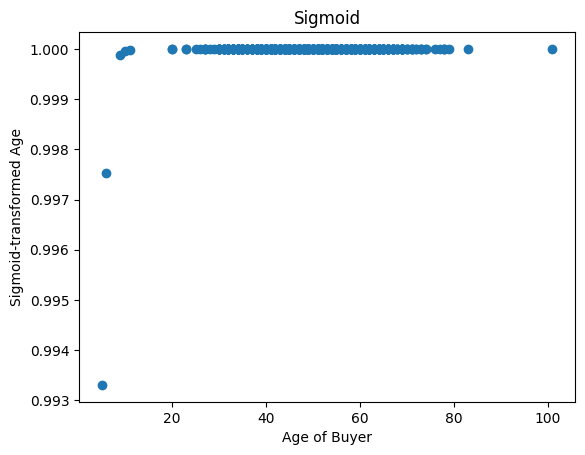

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sportscar.csv')

# Ensure 'Age of Buyers' column is numeric and clean the data
data['Age of Buyer'] = pd.to_numeric(data['Age of Buyer'], errors='coerce')  # Ensure 'Age of Buyers' is numeric

# Remove any rows with missing 'Age of Buyers' data
data_clean = data.dropna(subset=['Age of Buyer'])

# Function for the sigmoid calculation
sigmoid_gen = lambda x: (1 + np.exp(-x))**-1

# Generate data points
x = data_clean['Age of Buyer']  # Use 'Age of Buyers' column from the dataset
y = sigmoid_gen(x)  # Apply sigmoid transformation to 'Age of Buyers'

# Plot the sigmoid
plt.scatter(x, y)
plt.title('Sigmoid')
plt.xlabel('Age of Buyer')
plt.ylabel('Sigmoid-transformed Age')
plt.show()


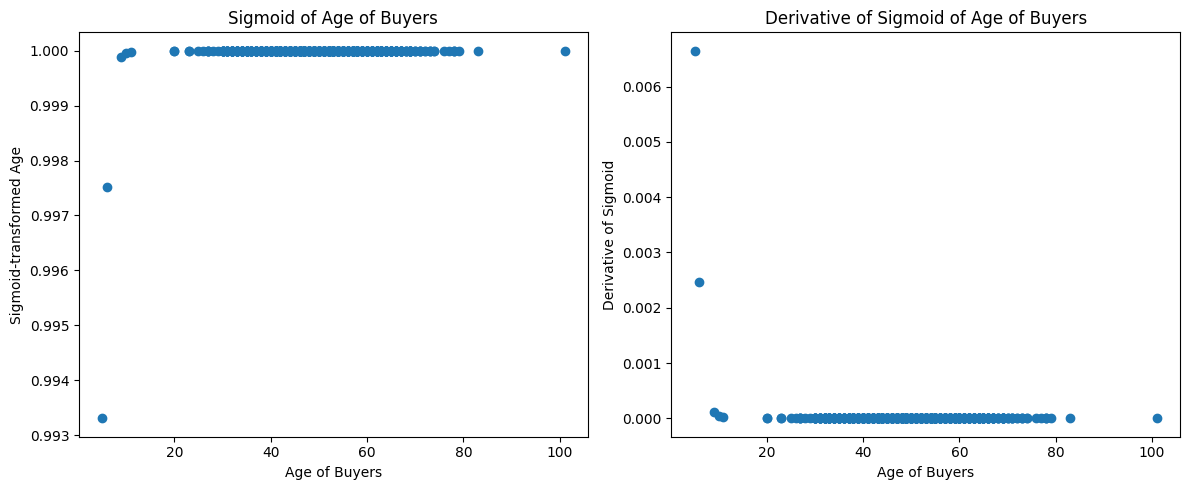

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sportscar.csv')

# Ensure 'Age of Buyers' column is numeric and clean the data
data['Age of Buyer'] = pd.to_numeric(data['Age of Buyer'], errors='coerce')  # Ensure 'Age of Buyers' is numeric

# Remove any rows with missing 'Age of Buyers' data
data_clean = data.dropna(subset=['Age of Buyer'])

# Sigmoid function and its derivative
sigmoid_gen = lambda x: (1 + np.exp(-x))**-1

def sigmoid(x, deriv=False):
    sig = 1 / (1 + np.exp(-x))
    if deriv:
        sig_deriv = sig * (1 - sig)  # Derivative of the sigmoid function
        return sig_deriv
    else:
        return sig

# Generate data points
x = data_clean['Age of Buyer']  # Use 'Age of Buyers' column from the dataset
y = sigmoid(x)  # Apply sigmoid transformation
y_deriv = sigmoid(x, deriv=True)  # Apply the derivative of sigmoid

# Plot the sigmoid and its derivative
_, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot the sigmoid function
ax1 = ax[0]
ax1.scatter(x, y)
ax1.set_title('Sigmoid of Age of Buyers')
ax1.set_xlabel('Age of Buyers')
ax1.set_ylabel('Sigmoid-transformed Age')

# Plot the derivative of the sigmoid
ax2 = ax[1]
ax2.scatter(x, y_deriv)
ax2.set_title('Derivative of Sigmoid of Age of Buyers')
ax2.set_xlabel('Age of Buyers')
ax2.set_ylabel('Derivative of Sigmoid')

plt.tight_layout()
plt.show()


Age of Buyer      0
Price (in USD)    0
dtype: int64
Feature matrix shape: (1007, 1), Target vector shape: (1007,)


<ipython-input-18-8294832beaee>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age of Buyer'].fillna(data['Age of Buyer'].median(), inplace=True)
<ipython-input-18-8294832beaee>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

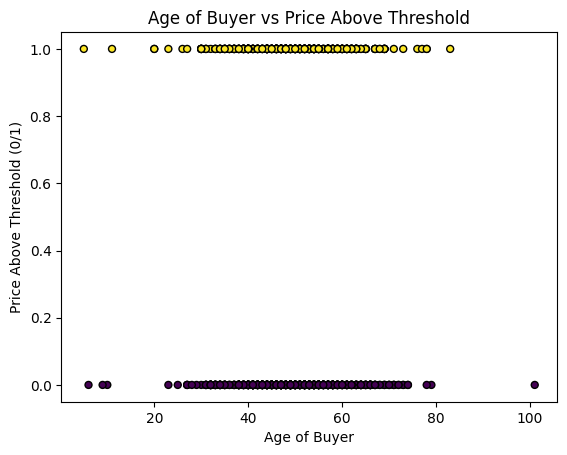

Accuracy: 0.6271


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sportscar.csv')

# Check for missing values in key columns
print(data[['Age of Buyer', 'Price (in USD)']].isnull().sum())

# Clean 'Price (in USD)' to remove commas and convert to numeric
data['Price (in USD)'] = data['Price (in USD)'].replace({',': ''}, regex=True)
data['Price (in USD)'] = pd.to_numeric(data['Price (in USD)'], errors='coerce')

# Fill missing values with the median for 'Age of Buyer' and 'Price (in USD)'
data['Age of Buyer'].fillna(data['Age of Buyer'].median(), inplace=True)
data['Price (in USD)'].fillna(data['Price (in USD)'].median(), inplace=True)

# Ensure 'Age of Buyer' and 'Price (in USD)' are numeric
data['Age of Buyer'] = pd.to_numeric(data['Age of Buyer'], errors='coerce')
data['Price (in USD)'] = pd.to_numeric(data['Price (in USD)'], errors='coerce')

# Create a binary classification target based on price threshold
threshold = 200000
data['Price_above_threshold'] = (data['Price (in USD)'] > threshold).astype(int)

# Feature matrix (X) and target vector (y)
X = data[['Age of Buyer']]  # Using 'Age of Buyer' as the feature
y = data['Price_above_threshold']  # The target is whether price > threshold

# Check if X and y are not empty
print(f"Feature matrix shape: {X.shape}, Target vector shape: {y.shape}")

# Plot the data for visualization
plt.scatter(X, y, marker='o', c=y, s=25, edgecolor='k')
plt.title("Age of Buyer vs Price Above Threshold")
plt.xlabel("Age of Buyer")
plt.ylabel("Price Above Threshold (0/1)")
plt.show()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Add intercept column (bias term)
intercept_train = np.ones((X_train.shape[0], 1))
X_train = np.concatenate((intercept_train, X_train), axis=1)

intercept_test = np.ones((X_test.shape[0], 1))
X_test = np.concatenate((intercept_test, X_test), axis=1)

# Logistic Regression model
model = linear_model.LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = model.score(X_test, y_test)

print(f"Accuracy: {accuracy:.4f}")


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sportscar.csv')

# Clean 'Price (in USD)' column: remove commas and convert to numeric
data['Price (in USD)'] = data['Price (in USD)'].replace({',': ''}, regex=True)  # Remove commas
data['Price (in USD)'] = pd.to_numeric(data['Price (in USD)'], errors='coerce')  # Convert to numeric

# Handle missing values
data['Age of Buyer'].fillna(data['Age of Buyer'].median(), inplace=True)
data['Price (in USD)'].fillna(data['Price (in USD)'].median(), inplace=True)

# Check for missing values
print(data.isnull().sum())

# Feature selection: Let's say we want to predict if the car's price is above or below the median
# Create a binary target variable
data['Price above median'] = (data['Price (in USD)'] > data['Price (in USD)'].median()).astype(int)

# Define features and target
X = data[['Age of Buyer']]  # Using 'Age of Buyer' as the feature
y = data['Price above median']  # Target: Whether price is above the median

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling helps reach convergence faster
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Add intercepts (bias term) to the features
intercept = np.ones((X_train.shape[0], 1))
X_train = np.concatenate((intercept, X_train), axis=1)  # Add intercept to training data
intercept = np.ones((X_test.shape[0], 1))
X_test = np.concatenate((intercept, X_test), axis=1)  # Add intercept to testing data

# Define the logistic regression functions for mini-batch gradient descent
def mini_batch_GD(X, y, max_iter=1000):
    w = np.zeros(X.shape[1])  # Initialize weights
    l_rate = 0.01  # Learning rate

    batch_size = int(0.1 * X.shape[0])  # Set batch size to 10% of the total data size
    for i in range(max_iter):
        # ix = np.random.randint(0, X.shape[0])  # Random index for mini-batch selection
        batch_X = X[ix:ix + batch_size]
        batch_y = y[ix:ix + batch_size]
        loss, grad = gradient(batch_X, batch_y, w)
        if i % 500 == 0:  # Print loss every 500 iterations
            print(f"Loss at iteration {i}: {loss}")
        w = w - l_rate * grad  # Update weights using gradient descent
    return w, i

def gradient(X, y, w):
    m = X.shape[0]
    h = h_theta(X, w)  # Predicted probabilities
    error = h - y  # Error term
    # Log-likelihood loss function
    loss = - np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    grad = np.dot(X.T, error)  # Gradient of the loss function
    return loss, grad

def sigmoid(x):
    return 1 / (1 + np.exp(-x))  # Sigmoid function

def h_theta(X, w):
    return sigmoid(X @ w)  # Predicted probabilities for logistic regression

def output(pred):
    return np.round(pred)  # Round predictions to 0 or 1

# Run mini-batch gradient descent
w, i = mini_batch_GD(X_train, y_train, max_iter=5000)

# Final weights after training
print(f"Final weights after {i} iterations: {w}")


<ipython-input-20-5e9bfcc7675a>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age of Buyer'].fillna(data['Age of Buyer'].median(), inplace=True)
<ipython-input-20-5e9bfcc7675a>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

Car Make                    0
Car Model                   8
Year                        0
Engine Size (L)            14
Horsepower                  0
Torque (lb-ft)              3
0-60 MPH Time (seconds)     0
Price (in USD)              0
Gender of buyer             4
Age of Buyer                0
dtype: int64
Loss at iteration 0: 48.52030263919618
Loss at iteration 500: 48.509382351951025
Loss at iteration 1000: 49.34981612865904
Loss at iteration 1500: 48.71903779394301
Loss at iteration 2000: 48.72172323003684
Loss at iteration 2500: 48.36694288038456
Loss at iteration 3000: 48.55463539806336
Loss at iteration 3500: 47.84335341916282
Loss at iteration 4000: 48.67086302731294
Loss at iteration 4500: 48.846815094558124
Final weights after 4999 iterations: [-0.20942996 -0.00903315]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Car Make                 1007 non-null   object
 1   Car Model                999 non-null    object
 2   Year                     1007 non-null   int64 
 3   Engine Size (L)          993 non-null    object
 4   Horsepower               1007 non-null   object
 5   Torque (lb-ft)           1004 non-null   object
 6   0-60 MPH Time (seconds)  1007 non-null   object
 7   Price (in USD)           1007 non-null   object
 8   Gender of buyer          1003 non-null   object
 9   Age of Buyer             1007 non-null   int64 
dtypes: int64(2), object(8)
memory usage: 78.8+ KB
None

Correlation Matrix:
                         Engine Size (L)  Horsepower  Torque (lb-ft)  \
Engine Size (L)                 1.000000    0.584818        0.604868   
Horsepower                      0.58

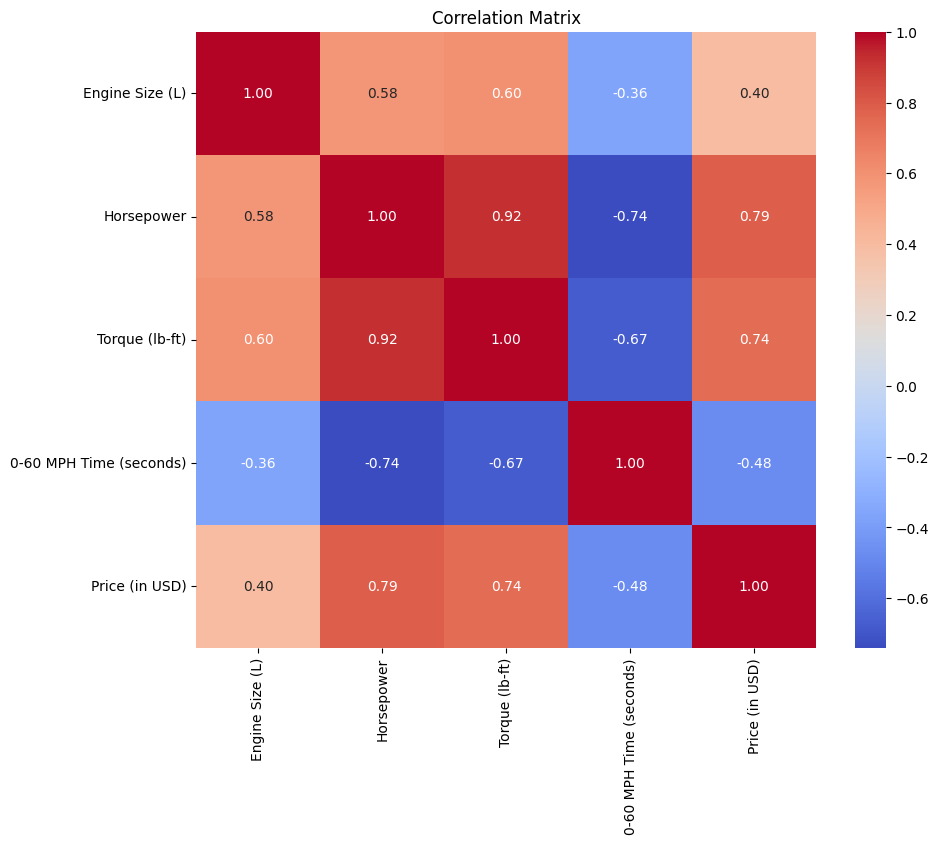

In [ ]:
#Correlation among orginal dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/sportscar.csv")

# Display the initial DataFrame info
print(df.info())

# Data Cleaning

# Clean the 'Price (in USD)' column by removing commas
df['Price (in USD)'] = df['Price (in USD)'].str.replace(',', '', regex=False)

# Convert relevant columns to numeric types
# Using errors='coerce' to convert non-numeric values to NaN
df['Engine Size (L)'] = pd.to_numeric(df['Engine Size (L)'], errors='coerce')
df['Horsepower'] = pd.to_numeric(df['Horsepower'], errors='coerce')
df['Torque (lb-ft)'] = pd.to_numeric(df['Torque (lb-ft)'], errors='coerce')
df['0-60 MPH Time (seconds)'] = pd.to_numeric(df['0-60 MPH Time (seconds)'], errors='coerce')
df['Price (in USD)'] = pd.to_numeric(df['Price (in USD)'], errors='coerce')

# Drop rows with NaN values in the relevant numeric columns
df.dropna(subset=['Engine Size (L)', 'Horsepower', 'Torque (lb-ft)', '0-60 MPH Time (seconds)', 'Price (in USD)'], inplace=True)

# Calculate the correlation matrix
correlation_matrix = df[['Engine Size (L)', 'Horsepower', 'Torque (lb-ft)', '0-60 MPH Time (seconds)', 'Price (in USD)']].corr()

# Display the correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

Missing values in 'RPM':
0

Correlation Matrix:
                Horsepower  Torque (lb-ft)  Price (in USD)  Age of Buyer  \
Horsepower        1.000000        0.941384        0.798908      0.034604   
Torque (lb-ft)    0.941384        1.000000        0.738440      0.027045   
Price (in USD)    0.798908        0.738440        1.000000      0.020225   
Age of Buyer      0.034604        0.027045        0.020225      1.000000   
RPM               0.262459       -0.050950        0.206402      0.024804   

                     RPM  
Horsepower      0.262459  
Torque (lb-ft) -0.050950  
Price (in USD)  0.206402  
Age of Buyer    0.024804  
RPM             1.000000  


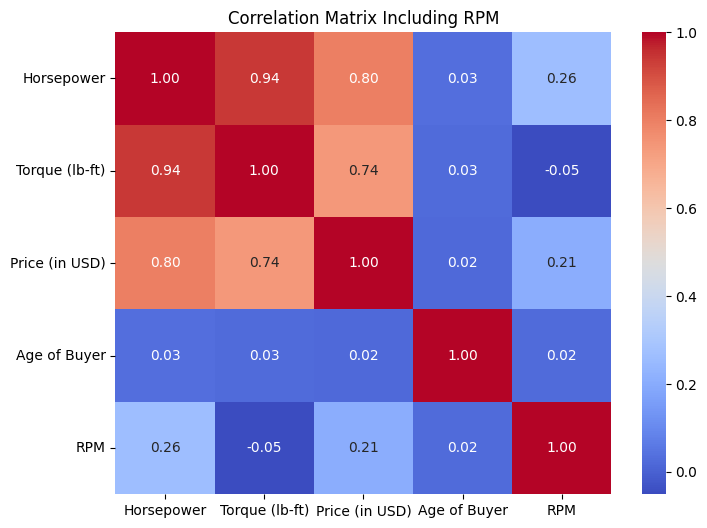

In [ ]:
#Feature Construction(RPM)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/sportscar.csv")


# Data Cleaning
# Convert relevant columns to numeric types
df['Horsepower'] = pd.to_numeric(df['Horsepower'], errors='coerce')
df['Torque (lb-ft)'] = pd.to_numeric(df['Torque (lb-ft)'], errors='coerce')

# Clean the 'Price (in USD)' column by removing commas and converting to numeric
df['Price (in USD)'] = df['Price (in USD)'].str.replace(',', '').astype(float)

# Drop rows with NaN values in 'Horsepower', 'Torque (lb-ft)', or 'Price (in USD)'
df.dropna(subset=['Horsepower', 'Torque (lb-ft)', 'Price (in USD)'], inplace=True)

# Create a new DataFrame with selected columns
df_new = df[['Horsepower', 'Torque (lb-ft)', 'Price (in USD)', 'Age of Buyer']].copy()

# Create the new feature "RPM"
df_new['RPM'] = df_new['Horsepower'] * 5252 / df_new['Torque (lb-ft)']

# Check for any NaN values in the new column
print("Missing values in 'RPM':")
print(df_new['RPM'].isnull().sum())

# Drop rows with NaN values in 'RPM' if necessary
df_new.dropna(subset=['RPM'], inplace=True)

# Calculate the correlation matrix including the new feature
correlation_matrix = df_new.corr()

# Display the correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix Including RPM")
plt.show()

